In [151]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score,precision_recall_curve,classification_report,roc_curve

In [152]:
data = pd.read_csv('..\\data\\traindata.csv')
labels = pd.read_csv('..\\data\\trainlabel.txt', header=None, names=['label'])['label']
data.insert(0, 'income', labels)

# one-hot encoding
cat_col = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
num_col = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
encode_data = pd.get_dummies(data, columns=cat_col)
encode_data.drop(['education', 'fnlwgt'], axis=1, inplace=True)

# nomalization
for col in num_col:
    encode_data[col] = (encode_data[col] - encode_data[col].mean()) / encode_data[col].std()

encode_data

,income,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,2.821444,1.131656,0.383292,-0.214685,-2.148626,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,0,0.108875,1.131656,-0.145057,-0.214685,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,-0.697564,-0.416177,-0.145057,3.690712,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.182188,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,-1.210753,-0.029219,-0.145057,-0.214685,-1.255236,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0,0.695377,-1.190094,-0.145057,-0.214685,0.775195,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22788,0,-0.917502,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22789,0,-0.184375,-0.416177,-0.145057,-0.214685,-0.036978,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22790,0,-0.404313,-0.029219,-0.145057,-0.214685,-0.036978,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 完全随机(直接预测多数)

In [153]:
testy = encode_data['income']
pred_label = np.zeros(len(testy))
#ROC
print(roc_auc_score(testy,pred_label))
#分类报告
print(classification_report(testy,pred_label))


0.5
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     17303
           1       0.00      0.00      0.00      5489

    accuracy                           0.76     22792
   macro avg       0.38      0.50      0.43     22792
weighted avg       0.58      0.76      0.66     22792



d:\something\anaconda3\envs\ai-proj3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\something\anaconda3\envs\ai-proj3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\something\anaconda3\envs\ai-proj3\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0, 0.5, 'True Positive Rate')

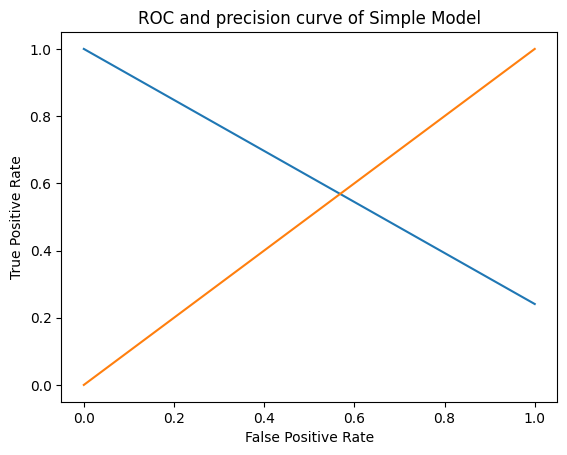

In [154]:
precision,recall,_ =precision_recall_curve(testy,pred_label)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred_label)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of Simple Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.7)
for train_index, test_index in sss.split(encode_data, encode_data['income']):
    trainx, trainy = encode_data.drop('income', axis=1).iloc[train_index], encode_data['income'].iloc[train_index]
    testx, testy = encode_data.drop('income', axis=1).iloc[test_index], encode_data['income'].iloc[test_index]

## 随机梯度下降

In [156]:
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(loss='log_loss', max_iter=100)
lr.fit(trainx, trainy)

SGDClassifier(loss='log_loss', max_iter=100)

In [157]:
pred =lr.predict_proba(testx)[:,1]
pred_labels = lr.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.9003346523516428
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     12113
           1       0.68      0.66      0.67      3842

    accuracy                           0.84     15955
   macro avg       0.79      0.78      0.78     15955
weighted avg       0.84      0.84      0.84     15955



Text(0, 0.5, 'True Positive Rate')

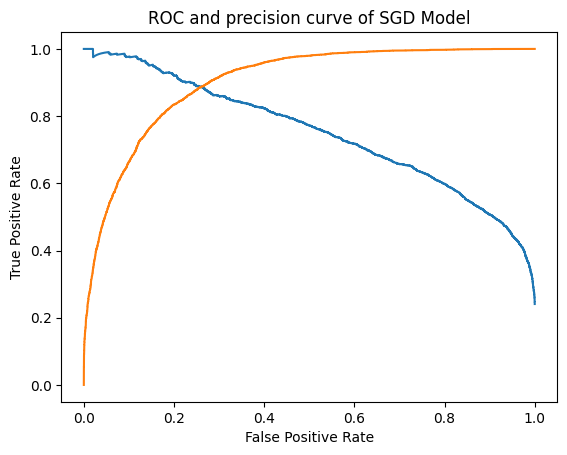

In [158]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of SGD Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 逻辑回归

In [159]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(trainx, trainy)
pred =lr.predict_proba(testx)[:,1]
pred_labels = lr.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.9064705865162741
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12113
           1       0.73      0.60      0.66      3842

    accuracy                           0.85     15955
   macro avg       0.81      0.76      0.78     15955
weighted avg       0.84      0.85      0.85     15955



Text(0, 0.5, 'True Positive Rate')

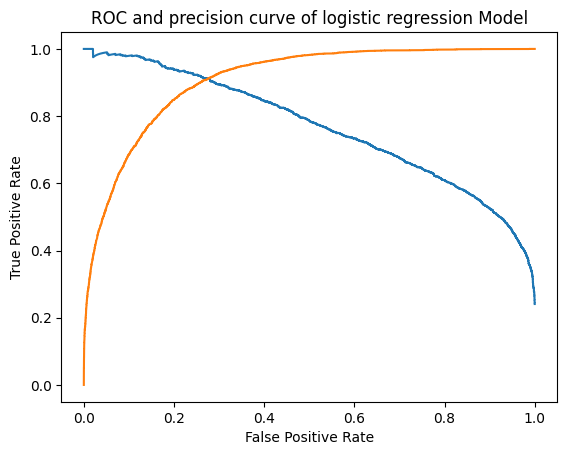

In [160]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of logistic regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 决策树

In [161]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(trainx, trainy)
pred =dt.predict_proba(testx)[:,1]
pred_labels = dt.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.7438925048711653
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12113
           1       0.60      0.60      0.60      3842

    accuracy                           0.81     15955
   macro avg       0.74      0.74      0.74     15955
weighted avg       0.81      0.81      0.81     15955



Text(0, 0.5, 'True Positive Rate')

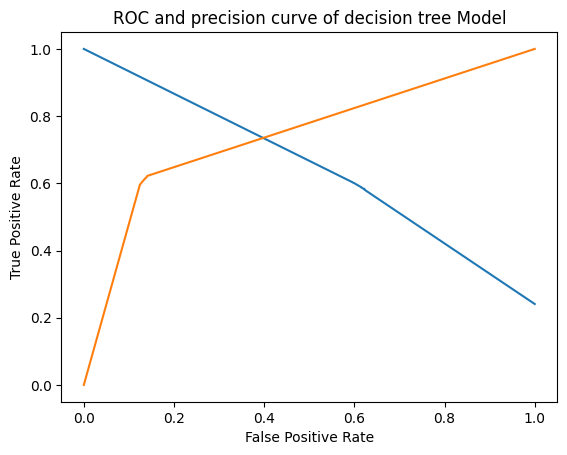

In [162]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of decision tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 随机森林

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(trainx, trainy)
pred =rf.predict_proba(testx)[:,1]
pred_labels = rf.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.8902766668014664
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12113
           1       0.71      0.61      0.65      3842

    accuracy                           0.84     15955
   macro avg       0.79      0.76      0.78     15955
weighted avg       0.84      0.84      0.84     15955



Text(0, 0.5, 'True Positive Rate')

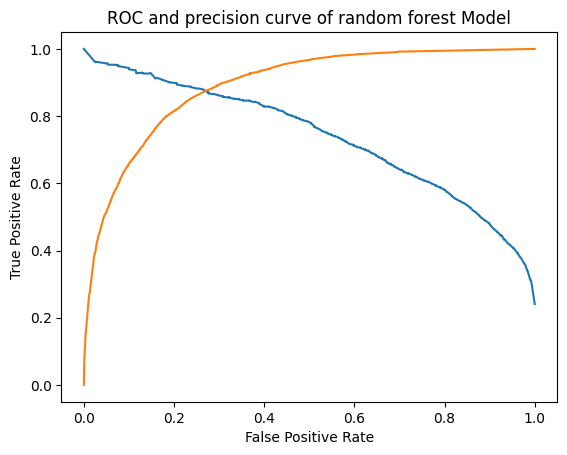

In [164]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of random forest Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## 梯度上升

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=6, n_estimators=100, learning_rate=0.1, random_state=0)
gb.fit(trainx, trainy)
pred =gb.predict_proba(testx)[:,1]
pred_labels = gb.predict(testx)
#ROC
print(roc_auc_score(testy,pred))
#分类报告
print(classification_report(testy,pred_labels))

0.9210719524580975
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     12113
           1       0.76      0.63      0.69      3842

    accuracy                           0.86     15955
   macro avg       0.83      0.78      0.80     15955
weighted avg       0.86      0.86      0.86     15955



Text(0, 0.5, 'True Positive Rate')

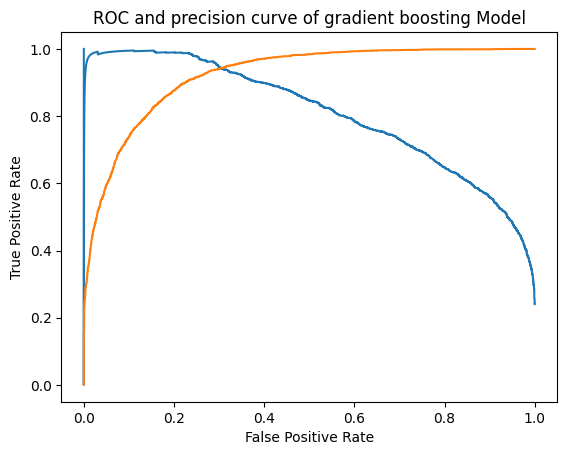

In [166]:
precision,recall,_ =precision_recall_curve(testy,pred)
plt.plot(recall,precision)
fpr,tpr,_ = roc_curve(testy,pred)
plt.plot(fpr,tpr)
plt.title('ROC and precision curve of gradient boosting Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')